# 9. The Bootstrap

Let $X_1, \dots, X_n \sim F$ be random variables distributed according to $F$, and

$$ T_n = g(X_1, \dots, X_n)$$

be a **statistic**, that is, any function of the data.  Suppose we want to know $\mathbb{V}_F(T_n)$, the variance of $T_n$.

For example, if $T_n = n^{-1}\sum_{i=1}^nX_i$ then $\mathbb{V}_F(T_n) = \sigma^2/n$ where $\sigma^2 = \int (x - \mu)^dF(x)$ and $\mu = \int x dF(x)$.

### 9.1 Simulation

Suppose we draw iid samples $Y_1, \dots, Y_B \sim G$.  By the law of large numbers,

$$ \overline{Y}_n = \frac{1}{B} \sum_{j=1}^B Y_j \; \xrightarrow{\text{P}} \int y dG(y) = \mathbb{E}(Y)$$

as $B \rightarrow \infty$.  So if we draw a large sample from $G$, we can use the sample mean to approximate the mean of the distribution.

More generally, if $h$ is any function with finite mean then, as $B \rightarrow \infty$,

$$\frac{1}{B} \sum_{j=1}^B h(Y_j) \; \xrightarrow{\text{P}} \int h(y) dG(y) = \mathbb{E}(h(Y))$$

In particular, for functions $a(Y_j) = Y_j^2$ and $b(Y_j) = Y_j$,

$$\frac{1}{B} \sum_{j=1}^B (Y_j - \overline{Y}) 
= \frac{1}{B} \sum_{j=1}^B Y_j^2 - \left(\frac{1}{B} \sum_{j=1}^B Y_j \right)^2
\xrightarrow{\text{P}} \int y^2 dG(y) - \left( \int y dG(y) \right)^2 = \mathbb{V}(Y)
$$

So we can use the sample variance of the simulated values to approximate $\mathbb{V}(Y)$.

### 9.2 Bootstrap Variance Estimation

To simulate from the distribution of a statistic $T_n$ when the data is assumed to have distribution $\hat{F}_n$, we simulate $X_1^*, \dots, X_n^*$ from $\hat{F}_n$ and then compute the statistic over these values, $T_n^* = g(X_1^*, \dots, X_n^*)$.

$$
\begin{align}
\text{Real world} \quad      & F         & \Longrightarrow\quad & X_1, \dots, X_n        & \Longrightarrow & \quad T_n = g(X_1, \dots, X_n) \\
\text{Bootstrap world} \quad & \hat{F}_n & \Longrightarrow\quad  & X_1^*, \dots, X_n^* & \Longrightarrow & \quad T_n^* = g(X_1^*, \dots, X_n^*)
\end{align}
$$

**Drawing an observation from $\hat{F}_n$ is equivalent to drawing one point at random from the original data set.**

#### Bootstrap Variance Estimation

1. Draw $X_1^*, \dots, X_n^* \sim \hat{F}_n$.
2. Compute $T_n^* = g(X_1^*, \dots, X_n^*)$.
3. Repeat steps 1 and 2, $B$ times, to get $T_{n, 1}^*, \dots, T_{n, B}^*$.
4. Let

$$ v_{\text{boot}} = \frac{1}{B} \sum_{b=1}^B \left( T_{n, b}^* - \frac{1}{B} \sum_{r=1}^B T_{n, r}^* \right)^2 $$

### 9.3 Bootstrap Confidence Intervals

**Normal Interval**.

$$ T_n \pm z_{\alpha/2} \hat{\text{se}}_\text{boot} $$

where $\hat{\text{se}}_\text{boot}$ is the bootstrap estimate of the standard error.  This is not accurate unless the distribution of $T_n$ is close to Normal.

**Pivotal Intervals**.

Let $\theta = T(F)$, $\hat{\theta}_n = T(\hat{F}_n)$ and define the **pivot** $R_n = \hat{\theta}_n  - \theta$.  Let $\hat{\theta}_{n, 1}^*, \dots, \hat{\theta}_{n, B}^*$ define bootstrap replications of $\hat{\theta}_n$.  Let $H(r)$ denote the CDF of the pivot:

$$ H(r) = \mathbb{P}_F(R_n \leq r)$$

Define the interval $C_n^* = (a, b)$ where

$$
a = \hat{\theta}_n - H^{-1}\left( 1 - \frac{\alpha}{2} \right) 
\quad\text{and}\quad
b = \hat{\theta}_n - H^{-1}\left( \frac{\alpha}{2} \right) 
$$

Then,

$$
\begin{align}
\mathbb{P}(a \leq \theta \leq b) &= \mathbb{P}(a - \hat{\theta}_n \leq \theta - \hat{\theta}_n \leq b - \hat{\theta}_n) \\
&= \mathbb{P}(\hat{\theta}_n - b \leq \hat{\theta}_n - \theta \leq \hat{\theta}_n - a) \\
&= \mathbb{P}(\hat{\theta}_n - b \leq R_n \leq \hat{\theta}_n - a) \\
&= H(\hat{\theta}_n - a) - H(\hat{\theta}_n - b) \\
&= H\left(H^{-1}\left( 1 - \frac{\alpha}{2} \right) \right) - H\left(H^{-1}\left( \frac{\alpha}{2} \right)\right) \\
&= 1 - \frac{\alpha}{2}  - \frac{\alpha}{2} = 1 - \alpha
\end{align}
$$

Hence $C_n^*$ is an exact $1 - \alpha$ confidence interval for $\theta$.  

Unfortunately, $a$ and $b$ depend on the unknown distribution $H$, but we can form a bootstrap estimate for it:

$$\hat{H}(r) = \frac{1}{B} \sum_{b=1}^B I(R_{n, b}^* \leq r)$$

where $R_{n, b}^* = \hat{\theta}_{n, b}^* - \hat{\theta}_n$.

Let $r_\beta^*$ denote the $\beta$ sample quantile of $(R_{n, 1}^*, \dots, R_{n, B}^*)$, and let $\theta_\beta^*$ denote the $\beta$ sample quantile of $(\theta_{n, 1}^*, \dots, \theta_{n, B}^*)$.  Note that $r_\beta^* = \theta_\beta^* - \hat{\theta}_n$.  It follows an approximate $1 - \alpha$ confidence interval $C_n = (\hat{a}, \hat{b})$ where

$$
\begin{align}
\hat{a} 
&= \hat{\theta}_n - \hat{H}^{-1}\left(1 - \frac{\alpha}{2}\right) 
&= \hat{\theta}_n - r_{1 - \alpha/2}^* 
&= 2\hat{\theta}_n - \theta_{1 - \alpha/2}^* \\
\hat{b} 
&= \hat{\theta}_n - \hat{H}^{-1}\left(\frac{\alpha}{2}\right) 
&= \hat{\theta}_n - r_{\alpha/2}^* 
&= 2\hat{\theta}_n - \theta_{\alpha/2}^* 
\end{align}
$$

The **$1 - \alpha$ bootstrap pivotal confidence** is

$$ C_n = \left(2 \hat{\theta}_n - \hat{\theta}_{1 - \alpha/2}^*, \; 2 \hat{\theta}_n - \hat{\theta}_{\alpha/2}^* \right) $$

**Theorem 9.3**.  Under weak conditions on $T(F)$, 

$$ \lim _{n \rightarrow \infty} \mathbb{P}_F\left(T(F) \in C_n\right) \rightarrow 1 - \alpha$$

**Percentile Intervals**.

The **bootstrap percentile interval** is defined by

$$ C_n = \left( \theta_{\alpha/2}^*, \; \theta_{1 - \alpha/2}^*\right) $$

### 9.5 Technical Appendix

#### The Jacknife

This method is less computationally expensive than bootstraping, but it is less general -- it does *not* produce consistent estimates of the standard errors of the sample quantiles.

Let $T_n = T(X_1, \dots, X_n)$ be a statistic and let $T_{(-i)}$ denote the statistic with the $i$-th observation removed.  Let $\overline{T}_n = n^{-1} \sum_{i=1}^n T_{(-1)}$.  The jacknife estimate of $\mathbb{V}(T_n)$ is

$$ v_\text{jack} = \frac{n - 1}{n} \sum_{i=1}^n \left(T_{(-i)} - \overline{T}_n \right)^2 $$

and the jacknife estimate of the standard error is $\hat{\text{se}}_\text{jack} = \sqrt{v_\text{jack}}$.

Under suitable conditions on $T$ it can be shown that $v_\text{jack} / \mathbb{V}(T_n) \xrightarrow{\text{P}} 1$.

#### Justification for the Percentile Interval

Suppose there exists a monotone transformation $U = m(T)$ such that $U \sim N(\phi, c^2)$ where $\phi = m(\theta)$.  

Let $U_t^* = m(\theta_{n, b}^*)$.  Let $u_\beta^*$ be the sample quantile of the $U_b^*$'s.  Since a monotone transformation preserves quantiles, we have that $u_{\alpha/2}^* = m(\theta_{\alpha/2}^*)$.  

Also, since $U \sim N(\phi, c^2)$ the $\alpha/2$ quantile of $U$ is $\phi - z_{\alpha/2}c$.  Hence $u_{\alpha/2}^* = \phi - z_{\alpha/2}c$.  Similarly, $u_{1 - \alpha/2}^* = \phi + z_{\alpha/2}c$.  

Therefore,

$$
\begin{align}
\mathbb{P}(\theta_{\alpha/2}^* \leq \theta \leq \theta_{1 - \alpha/2}^*) &=
\mathbb{P}(m(\theta_{\alpha/2}^*) \leq m(\theta) \leq m(\theta_{1 - \alpha/2}^*)) \\
&= \mathbb{P}(u_{\alpha/2}^* \leq \phi \leq u_{1 - \alpha/2}^*) \\
&= \mathbb{P}(U - cz_{\alpha/2} \leq \phi \leq U + cz_{1 - \alpha/2}) \\
&= \mathbb{P}\left(-z_{\alpha/2} \leq \frac{Y - \phi}{c} \leq z_{1 - \alpha/2} \right) \\
&= 1 - \alpha
\end{align}
$$

### 9.6 Exercises

**Exercise 9.6.1**.  Consider the data in example 9.6.  

- Find the plug-in estimate of the correlation coefficient.  
- Estimate the standard error using the bootstrap.  
- Find a 95% confidence interval using all three methods.

In [1]:
# Data from example 9.6:

LSAT = [576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]
GPA = [3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96]

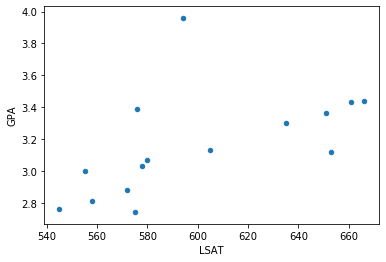

In [2]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
%matplotlib inline

df = pd.DataFrame({'LSAT': LSAT, 'GPA': GPA})
df.plot.scatter(x='LSAT', y='GPA')

In [3]:
# Plug-in estimates for mean and correlation

X = df['LSAT'].to_numpy()
Y = df['GPA'].to_numpy()

def corr(X, Y):
    mu_x = X.mean()
    mu_y = Y.mean()

    return sum((X - mu_x) * (Y - mu_y)) / math.sqrt(sum((X - mu_x)**2) * sum((Y - mu_y)**2))
  

theta_hat = corr(X, Y)
    
print('Estimated correlation coefficient: %.4f' % corr(X, Y))

Estimated correlation coefficient: 0.5459


In [4]:
# Bootstrap for SE of correlation coefficient

nx = len(X)
ny = len(Y)

B = 1000000
t_boot = np.empty(B)
for i in tqdm_notebook(range(B)):
    xx = np.random.choice(X, nx, replace=True)
    yy = np.random.choice(Y, ny, replace=True)
    t_boot[i] = corr(xx, yy)
    
se = t_boot.std()

print('Estimated SE of correlation coefficient: %.4f' % se)


Estimated SE of correlation coefficient: 0.2674


In [5]:
# Confidence intervals obtained from bootstrap

from scipy.stats import norm

z = norm.ppf(.975)

normal_conf = (theta_hat - z * se, theta_hat + z * se)
percentile_conf = (np.quantile(t_boot, .025), np.quantile(t_boot, .975))
pivotal_conf = (2*theta_hat - np.quantile(t_boot, 0.975), 2*theta_hat - np.quantile(t_boot, .025))

print('95%% confidence interval (Normal): \t %.3f, %.3f' % normal_conf)
print('95%% confidence interval (percentile): \t %.3f, %.3f' % percentile_conf)
print('95%% confidence interval (pivotal): \t %.3f, %.3f' % pivotal_conf)

95% confidence interval (Normal): 	 0.022, 1.070
95% confidence interval (percentile): 	 -0.503, 0.522
95% confidence interval (pivotal): 	 0.569, 1.594


**Exercise 9.6.2**.  (Computer Experiment).  Conduct a simulation to compare the four bootstrap confidence interval methods.

Let $n = 50$ and let $T(F) = \int (x - \mu)^3 dF(x) / \sigma^3$ be the skewness.  Draw $Y_1, \dots, Y_n \sim N(0, 1)$ and set $X_i = e^{Y_i}$, $i = 1, \dots, n$.  Construct the four types of bootstrap 95% intervals for $T(F)$ from the data $X_1, \dots, X_n$.  Repeat this whole thing many times and estimate the true coverage of the four intervals.

In [6]:
import numpy as np
from tqdm import tqdm_notebook
from scipy.stats import norm

def create_data(n=50):
    y = norm.rvs(size=n)
    return np.exp(y)

def skewness(x):
    n = len(x)
    mu = sum(x) / n
    var = sum((x - mu)**2) / n
    return sum((x - mu)**3 / (n * var**(3/2)))

def bootstrap_values(x, B=10000, show_progress=True):
    n = len(x)
    t_boot = np.empty(B)
    iterable = tqdm_notebook(range(B)) if show_progress else range(B)
    for i in iterable:
        xx = np.random.choice(x, n, replace=True)
        t_boot[i] = skewness(xx)

    return t_boot

def bootstrap_intervals(theta_hat, t_boot, alpha=0.05):
    se = t_boot.std()
    
    z = norm.ppf(1 - alpha/2)
    q_half_alpha = np.quantile(t_boot, alpha/2)
    q_c_half_alpha = np.quantile(t_boot, 1 - alpha/2)

    normal_conf = (theta_hat - z * se, theta_hat + z * se)
    percentile_conf = (q_half_alpha, q_c_half_alpha)
    pivotal_conf = (2*theta_hat - q_c_half_alpha, 2*theta_hat - q_half_alpha)
    
    return normal_conf, percentile_conf, pivotal_conf

In [7]:
# Creating the data
x = create_data(n=50)

In [8]:
# Nonparametric Bootstrap
theta_hat = skewness(x)
t_boot = bootstrap_values(x, B=100000)

normal_conf, percentile_conf, pivotal_conf = bootstrap_intervals(theta_hat, t_boot, alpha=0.05)

print('95%% confidence interval (Normal): \t %.3f, %.3f' % normal_conf)
print('95%% confidence interval (percentile): \t %.3f, %.3f' % percentile_conf)
print('95%% confidence interval (pivotal): \t %.3f, %.3f' % pivotal_conf)


95% confidence interval (Normal): 	 1.032, 2.638
95% confidence interval (percentile): 	 1.154, 2.757
95% confidence interval (pivotal): 	 0.912, 2.515


**Note**: parametric bootstrap is only covered in chapter 10.  The below assumes that "four types of bootstrap" in the exercise refers to the 3 types of nonparametric bootstrap covered in chapter 9, plus parametric bootstrap from chapter 10.

For the parametric bootstrap, assume $X = e^Y$ where $Y \sim N(\mu, \sigma^2)$.  Then

$$
\begin{align}
\mathbb{E}(X) & = \mathbb{E}(e^Y) = \int_{-\infty}^\infty e^y \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{y - \mu}{\sigma} \right)^2} dy = \frac{1}{\sigma \sqrt{2 \pi}} \int e^{y - \frac{1}{2}\left(\frac{y - \mu}{\sigma}\right)^2} dy = e^{\mu + \sigma^2/2} \\
\mathbb{E}(X^2) &= \mathbb{E}(e^{2Y}) = e^{2\mu + (2\sigma)^2/2} = e^{2\mu + 2\sigma^2}
\end{align}
$$

Solving the two equations for the moments we get parameter estimates:

$$
\begin{align}
\hat{\mu}_Y & = 4 \log \mathbb{E}(X) - \log \mathbb{E}(X^2) \\
\hat{\sigma}_Y & = \sqrt{\log \mathbb{E}(X^2) - 2 \log \mathbb{E}(X)}
\end{align}
$$

From these parameter estimates, we can generate bootstrap samples:  sample values for $Y_i ~ N(\hat{\mu}_Y, \hat{\sigma}_Y^2)$, calculate $X_i = Y_i$, and calculate the statistic $T(X_i)$ on each sample generated this way.

In [9]:
# Parametric bootstrap
# Assume X = e^Y, Y ~ N(\mu, \sigma^2)

def estimate_parameters(x):
    log_e_x = np.log(x.mean())
    log_e_x2 = np.log((x**2).mean())
    
    mu_Y_hat = 4 * log_e_x - log_e_x2
    sigma_Y_hat = np.sqrt(log_e_x2 - 2 * log_e_x)
    
    return mu_Y_hat, sigma_Y_hat

def bootstrap_skewness_parametric(mu, sigma, n, B = 10000, show_progress=True):
    t_boot = np.empty(B)
    iterable = tqdm_notebook(range(B)) if show_progress else range(B)
    for i in iterable:
        xx = np.exp(norm.rvs(size=n, loc=n, scale=sigma))
        t_boot[i] = skewness(xx)
        
    return t_boot

def bootstrap_parametric_intervals(mu, t_boot, alpha=0.05):
    se = t_boot.std()
    z = norm.ppf(1 - alpha/2)
    
    return (theta_hat - z * se, theta_hat + z * se)

In [10]:
mu_X_hat = x.mean()
mu_Y_hat, sigma_Y_hat = estimate_parameters(x)
t_boot = bootstrap_skewness_parametric(mu_Y_hat, sigma_Y_hat, 50, B=100000)

parametric_normal_conf = bootstrap_parametric_intervals(mu_X_hat, t_boot, alpha=0.05)
print('95%% confidence interval (Parametric Normal): \t %.3f, %.3f' % parametric_normal_conf)


95% confidence interval (Parametric Normal): 	 -0.181, 3.851


In [11]:
# Repeat nonparametric bootstrap many times
n_experiments = 10

normal_conf = np.empty((n_experiments, 2))
percentile_conf = np.empty((n_experiments, 2))
pivotal_conf = np.empty((n_experiments, 2))

for i in tqdm_notebook(range(n_experiments)):
    theta_hat = skewness(x)
    t_boot_experiment = bootstrap_values(x, B=100000, show_progress=False)
    normal_conf[i], percentile_conf[i], pivotal_conf[i] = bootstrap_intervals(theta_hat, t_boot_experiment, alpha=0.05)

In [12]:
print('Normal confidence lower bound: \t\t mean %.3f, SE %.3f' % 
      (normal_conf[:, 0].mean(), normal_conf[:, 0].std()))
print('Normal confidence upper bound: \t\t mean %.3f, SE %.3f' % 
      (normal_conf[:, 1].mean(), normal_conf[:, 1].std()))

print('Percentile confidence lower bound: \t mean %.3f, SE %.3f' % 
      (percentile_conf[:, 0].mean(), percentile_conf[:, 0].std()))
print('Percentile confidence upper bound: \t mean %.3f, SE %.3f' % 
      (percentile_conf[:, 1].mean(), percentile_conf[:, 1].std()))

print('Pivotal confidence lower bound: \t mean %.3f, SE %.3f' % 
      (pivotal_conf[:, 0].mean(), pivotal_conf[:, 0].std()))
print('Pivotal confidence upper bound: \t mean %.3f, SE %.3f' % 
      (pivotal_conf[:, 1].mean(), pivotal_conf[:, 1].std()))

Normal confidence lower bound: 		 mean 1.031, SE 0.001
Normal confidence upper bound: 		 mean 2.639, SE 0.001
Percentile confidence lower bound: 	 mean 1.154, SE 0.002
Percentile confidence upper bound: 	 mean 2.762, SE 0.005
Pivotal confidence lower bound: 	 mean 0.907, SE 0.005
Pivotal confidence upper bound: 	 mean 2.515, SE 0.002


In [13]:
# Repeat parametric bootstrap many times

n_experiments = 10
parametric_normal_conf = np.empty((n_experiments, 2))

for i in tqdm_notebook(range(n_experiments)):
    mu_X_hat = x.mean()
    mu_Y_hat, sigma_Y_hat = estimate_parameters(x)
    t_boot = bootstrap_skewness_parametric(mu_Y_hat, sigma_Y_hat, 50, B=100000, show_progress=False)
    parametric_normal_conf[i] = bootstrap_parametric_intervals(mu_X_hat, t_boot, alpha=0.05)

In [14]:
print('Parametric Normal confidence lower bound: \t mean %.3f, SE %.3f' % 
      (parametric_normal_conf[:, 0].mean(), parametric_normal_conf[:, 0].std()))
print('Parametric Normal confidence upper bound: \t mean %.3f, SE %.3f' % 
      (parametric_normal_conf[:, 1].mean(), parametric_normal_conf[:, 1].std()))

Parametric Normal confidence lower bound: 	 mean -0.185, SE 0.003
Parametric Normal confidence upper bound: 	 mean 3.854, SE 0.003


**Exercise 9.6.3**.  Let  $X_1, \dots, X_n \sim t_3$ where $n = 25$.  Let $\theta = T(F) = (q_{.75} - q_{.25})/1.34$ where $q_p$ denotes the $p$-th quantile.  Do a simulation to compare the coverage and length of the following confidence intervals for $\theta$:

- Normal interval with standard error from the bootstrap
- Bootstrap percentile interval

Remark: the jacknife does not give a consistent estimator of the variance of a quantile.

**Solution**.  We will assume that $t_3$ represents a t-distribution with shape parameter 3.

In [15]:
import numpy as np
from scipy.stats import t
from tqdm import tqdm_notebook

n = 25
X = t.rvs(3, size=25)

In [16]:
def T(x):
    return (np.quantile(x, 0.75) - np.quantile(x, 0.25)) / 1.34

In [17]:
theta_hat = T(X)

In [18]:
# Run bootstrap

B = 1000000
t_boot = np.empty(B)
for i in tqdm_notebook(range(B)):
    xx = np.random.choice(X, n, replace=True)
    t_boot[i] = T(xx)
    
se_boot = t_boot.std()

alpha = 0.05
z = norm.ppf(1 - alpha/2)
q_half_alpha = np.quantile(t_boot, alpha/2)
q_c_half_alpha = np.quantile(t_boot, 1 - alpha/2)

normal_conf = (theta_hat - z * se_boot, theta_hat + z * se_boot)
percentile_conf = (q_half_alpha, q_c_half_alpha)

print('95%% confidence interval (Normal): \t %.3f, %.3f' % normal_conf)
print('95%% confidence interval (percentile): \t %.3f, %.3f' % percentile_conf)


95% confidence interval (Normal): 	 0.032, 2.089
95% confidence interval (percentile): 	 0.605, 2.378


**Exercise 9.6.4**.  Let $X_1, \dots, X_n$ be distinct observations (no ties).  Show that there are

$$ \binom{2n - 1}{n}$$

distinct bootstrap samples.

Hint: Imagine putting $n$ balls into $n$ buckets.

**Solution**.

Each bootstrap sample (random draws with replacement) will select $a_i$ copies of $X_i$, where $0 \leq a_i \leq n$ and $\sum_{i=1}^n a_i = n$, for integer $a_i$.  Each bootstrap sample is uniquely represented by this sequence of variables, and each sequence of variables uniquely determines a bootstrap sample -- so the number of distinct bootstrap samples is equal to the number of solutions to this equation, that is, the number of partitions of $n$ into $n$ buckets.

Lets write $a_i$ explicitly in base 1, representing it as $a_i$ consecutive copies of the digit 1:

$$
\begin{align}
0_{10} & = \text{empty string}_1 \\
1_{10} & = 1_1 \\
2_{10} & = 11_1 \\
3_{10} & = 111_1 \\
4_{10} & = 1111_1 \\
\vdots
\end{align}
$$

So a solution for

$$a_1 + a_2 + \dots + a_n = n$$

is uniquely represented by a sequence of $2n - 1$ symbols, being $n$ digits $1$ and $n - 1$ plus signs.  For example, if $a_1 = 3$, $a_2 = 0$, $a_3 = 1$, then we write

$$ 111 + + 1 + \dots = n $$

The number of such solutions is then obtained by choosing $n$ of the $2n - 1$ symbols to be digit $1$ -- that is, $\binom{2n - 1}{n}$.

**Exercise 9.6.5**.  Let $X_1, \dots, X_n$ be distinct observations (no ties).  Let $X_1^*, \dots, X_n^*$ denote a bootstrap sample and let $\overline{X}_n^* = n^{-1}\sum_{i=1}^nX_i^*$.  Find:

- $\mathbb{E}(\overline{X}_n^* | X_1, \dots, X_n)$
- $\mathbb{V}(\overline{X}_n^* | X_1, \dots, X_n)$
- $\mathbb{E}(\overline{X}_n^*)$
- $\mathbb{V}(\overline{X}_n^*)$

**Solution**.

**(a)** $$
\begin{align}
\mathbb{E}(\overline{X}_n^* | X_1, \dots, X_n) &= \mathbb{E}\left(n^{-1}\sum_{i=1}^nX_i\right) = n^{-1}\sum_{i=1}^n \mathbb{E}(X_i) = \mathbb{E}(X)
\end{align}
$$

**(b)** $$
\begin{align}
\mathbb{V}(\overline{X}_n^* | X_1, \dots, X_n) & =
\mathbb{E}((\overline{X}_n^*)^2 | X_1, \dots, X_n) - \mathbb{E}(\overline{X}_n^* | X_1, \dots, X_n)^2 \\
&= \mathbb{E}\left(\left(n^{-1}\sum_{i=1}^nX_i\right)^2\right) - \mathbb{E}\left(n^{-1}\sum_{i=1}^nX_i\right)^2 \\
&= n^{-2} \mathbb{E}\left(\sum_{i=1}^nX_i^2 + \sum_{i=1}^n \sum_{j=1, j \neq i}^n X_i X_j\right) - \mathbb{E}(X)^2 \\
&= n^{-2} \sum_{i=1}^n \mathbb{E}(X_i^2) + n^{-2} \sum_{i=1}^n \sum_{j=1, j \neq i}^n \mathbb{E}(X_i X_j) - \mathbb{E}(X)^2  \\
&= n^{-1} (\mathbb{V}(X) + \mathbb{E}(X)^2) + n^{-2} \sum_{i=1}^n \sum_{j=1, j \neq i}^n \mathbb{E}(X_i) \mathbb{E}(X_j) - \mathbb{E}(X)^2 \\
&= n^{-1} (\mathbb{V}(X) + \mathbb{E}(X)^2) + n^{-1} (n - 1) \mathbb{E}(X)^2 - \mathbb{E}(X)^2 \\
&= \frac{1}{n}\mathbb{V}(X)
\end{align}
$$

**(c)** $$
\begin{align}
\mathbb{E}(\overline{X}_n^*) &= \mathbb{E}\left(n^{-1} \sum_{i=1}^nX_i^*\right) = n^{-1} \sum_{i=1}^n \mathbb{E}(X_i^*) = \mathbb{E}(X)
\end{align}
$$

**(d)** $$
\begin{align}
\mathbb{V}(\overline{X}_n^*) &= \mathbb{E}((\overline{X}_n^*)^2) - \mathbb{E}(\overline{X}_n^*)^2 \\
&= \mathbb{E}\left(\left(n^{-1} \sum_{i=1}^nX_i^*\right)^2\right) - \mathbb{E}(X)^2 \\
&= n^{-2} \sum_{i=1}^n\sum_{j=1}^n \mathbb{E}(X_i^* X_j^*) - \mathbb{E}(X)^2
\end{align}
$$

Now, the same value $X_k$ may have been sampled twice in $\mathbb{E}(X_i^* X_j^*)$.  This always happens when $i = j$, and this happens with probability $1 / n$ when $i \neq j$. Thus,

$$
\begin{align}
\mathbb{V}(\overline{X}_n^*) 
&= n^{-2} \left(\sum_{i=1}^n \mathbb{E}(X_i^2) + \sum_{i=1}^n \sum_{j=1, j \neq i}^n \left( \frac{1}{n} \mathbb{E}(X_i^2) + \left(1 - \frac{1}{n}\right)\mathbb{E}(X_i)\mathbb{E}(X_j)\right) \right) - \mathbb{E}(X)^2 \\
&= n^{-1} \mathbb{E}(X^2) + n^{-2} (n-1) \mathbb{E}(X^2) + n^{-2}(n-1)^2 E(X)^2 - \mathbb{E}(X)^2 \\
&= n^{-2} (2n - 1) \left( \mathbb{E}(X^2) - \mathbb{E}(X)^2 \right) \\
&= \frac{2n - 1}{n^2} \mathbb{V}(X)
\end{align}
$$

**Exercise 9.6.6**.  (Computer Experiment).  Let $X_1, \dots, X_n \sim N(\mu, 1)$.  Let $\theta = e^\mu$and let $\hat{\theta} = e^{\overline{X}}$ be the mle.  Create a dataset (using $\mu = 5$) consisting of $n = 100$ observations.

**(a)** Use the bootstrap to get the $\text{se}$ and 95% confidence interval for $\theta$.

**(b)** Plot a histogram of the bootstrap replications for the parametric and non-parametric bootstraps.  These are estimates of the distribution of $\hat{\theta}$.  Compare this to the true sampling distribution of $\hat{\theta}$.

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm_notebook
%matplotlib inline

X = norm.rvs(loc=5, scale=1, size=100)

In [20]:
# Get estimated value

theta_hat = np.exp(X.mean())

# Run nonparametric bootstrap

B = 1000000
t_boot_nonparam = np.empty(B)
n = len(X)
for i in tqdm_notebook(range(B)):
    xx = np.random.choice(X, n, replace=True)
    t_boot_nonparam[i] = np.exp(xx.mean())
    
se_boot = t_boot_nonparam.std()

alpha = 0.05
z = norm.ppf(1 - alpha/2)
normal_conf = (theta_hat - z * se_boot, theta_hat + z * se_boot)

print('95%% confidence interval (Normal): \t %.3f, %.3f' % normal_conf)


95% confidence interval (Normal): 	 104.486, 160.228


In [21]:
# Run parametric bootstrap

mu_hat = X.mean()
theta_hat = np.exp(mu_hat)

B = 1000000
t_boot_param = np.empty(B)
n = len(X)
for i in tqdm_notebook(range(B)):
    xx = norm.rvs(size=n, loc=mu_hat, scale=1)
    t_boot_param[i] = np.exp(xx.mean())
    
se_boot_param = t_boot_param.std()

alpha = 0.05
z = norm.ppf(1 - alpha/2)
normal_conf_param = (theta_hat - z * se_boot_param, theta_hat + z * se_boot_param)

print('95%% confidence interval (Parametric Normal): \t %.3f, %.3f' % normal_conf_param)


95% confidence interval (Parametric Normal): 	 106.225, 158.490


For the true sampling distribution,

$$ \overline{X} = \frac{1}{n} \sum_{i=1}^n X_i \sim \frac{1}{n} N(n \mu, n) = N(\mu, n^{-2})$$

so the distribution of $\hat{\theta}$ is the distribution of $e^\overline{X}$.  Its CDF is:

$$
\mathbb{P}\left(\hat{\theta} \leq t\right) = 
\mathbb{P}\left(e^\overline{X} \leq t\right) = 
\mathbb{P}\left(\overline{X} \leq \log t\right) = F_{\overline{X}}\left(\log t\right)
$$

In [22]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot

bins = np.linspace(50, 250, 500)

In [23]:
# Generate the CDF for theta, calculate it for each bin, and include the differences between bins

def theta_cdf(x):
    return norm.cdf(np.log(x), loc=5, scale=1/50)

theta_cdf_bins = list(map(theta_cdf, bins))
theta_cdf_bins_delta = np.empty(len(bins))
theta_cdf_bins_delta[0] = 0
theta_cdf_bins_delta[1:] = np.diff(theta_cdf_bins)

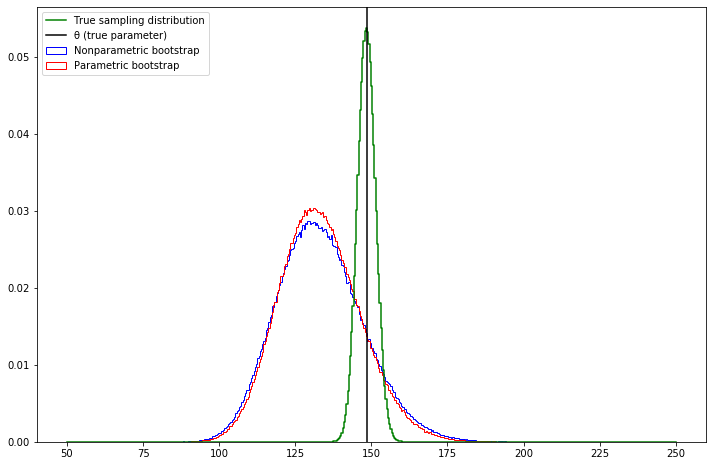

In [24]:
pyplot.figure(figsize=(12, 8))
pyplot.hist(t_boot_nonparam, bins, label='Nonparametric bootstrap', color='blue', histtype='step', density=True)
pyplot.hist(t_boot_param, bins, label='Parametric bootstrap', color='red', histtype='step', density=True)
pyplot.step(bins, theta_cdf_bins_delta, color='green', label='True sampling distribution')
pyplot.axvline(x=np.exp(5), color='black', label='θ (true parameter)')
pyplot.legend(loc='upper left')
pyplot.show()

**Exercise 9.6.7**. Let $X_1, \dots, X_n \sim \text{Uniform}(0, \theta)$.  The mle is $\hat{\theta} = X_\text{max} = \max \{ X_1, \dots, X_n \}$.  Generate a dataset of size 50 with $\theta = 1$.

**(a)**  Find the distribution of $\hat{\theta}$.  Compare the true distribution of $\hat{\theta}$ to the histograms from the parametric and nonparametric bootstraps.

**(b)**  This is a case where the nonparametric bootstrap does very poorly.  In fact, we can prove that this is the case.  Show that, for parametric bootstrap $\mathbb{P}(\hat{\theta}^* = \hat{\theta}) = 0$ but for the nonparametric $\mathbb{P}(\hat{\theta}^* = \hat{\theta}) \approx 0.632$.

Hint: show that $\mathbb{P}(\hat{\theta}^* = \hat{\theta}) = 1 - (1 - (1/n))^n$ then take the limit as $n$ gets large.

In [25]:
import numpy as np

X = np.random.uniform(low=0, high=1, size=50)

In [26]:
# Nonparametric bootstrap

theta_hat = X.max()

B = 1000000
t_boot_nonparam = np.empty(B)
n = len(X)
for i in tqdm_notebook(range(B)):
    xx = np.random.choice(X, n, replace=True)
    t_boot_nonparam[i] = xx.max()
    
se_boot = t_boot_nonparam.std()

alpha = 0.05
z = norm.ppf(1 - alpha/2)
normal_conf = (theta_hat - z * se_boot, theta_hat + z * se_boot)

print('95%% confidence interval (Normal): \t %.3f, %.3f' % normal_conf)


95% confidence interval (Normal): 	 0.959, 1.037


In [27]:
# Run parametric bootstrap

theta_hat = X.max()

B = 1000000
t_boot_param = np.empty(B)
n = len(X)
for i in tqdm_notebook(range(B)):
    xx = np.random.uniform(low=0, high=theta_hat, size=50)
    t_boot_param[i] = xx.max()
    
se_boot_param = t_boot_param.std()

alpha = 0.05
z = norm.ppf(1 - alpha/2)
normal_conf_param = (theta_hat - z * se_boot_param, theta_hat + z * se_boot_param)

print('95%% confidence interval (Parametric Normal): \t %.3f, %.3f' % normal_conf_param)


95% confidence interval (Parametric Normal): 	 0.960, 1.036


For the true sampling distribution,

$$\hat{\theta} = \max \{ X_1, \dots X_n \}$$

Its CDF is

$$\mathbb{P}(\hat{\theta} \leq x) = \prod_{i=1}^n \mathbb{P}(X_i \leq x) = F_{\text{Uniform}(0, \theta)}(x)^n$$

where

$$F_{\text{Uniform}(0, \theta)}(x) = \begin{cases}
0 & \text{if } x \leq 0 \\
\frac{x}{\theta} & \text{if } 0 < x \leq \theta \\
1 & \text{if } \theta < x
\end{cases}
$$

In [28]:
bins = np.linspace(0.75, 1.05, 200)

In [29]:
# Generate the CDF for theta, calculate it for each bin, and include the differences between bins

def theta_cdf(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    return x**50

theta_cdf_bins = list(map(theta_cdf, bins))
theta_cdf_bins_delta = np.empty(len(bins))
theta_cdf_bins_delta[0] = 0
theta_cdf_bins_delta[1:] = np.diff(theta_cdf_bins)

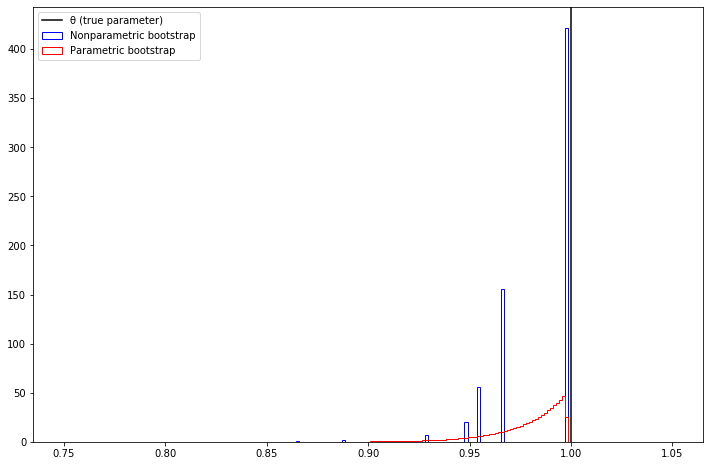

In [30]:
pyplot.figure(figsize=(12, 8))
pyplot.hist(t_boot_nonparam, bins, label='Nonparametric bootstrap', color='blue', histtype='step', density=True)
pyplot.hist(t_boot_param, bins, label='Parametric bootstrap', color='red', histtype='step', density=True)
pyplot.axvline(x=1, color='black', label='θ (true parameter)')
pyplot.legend(loc='upper left')
pyplot.show()

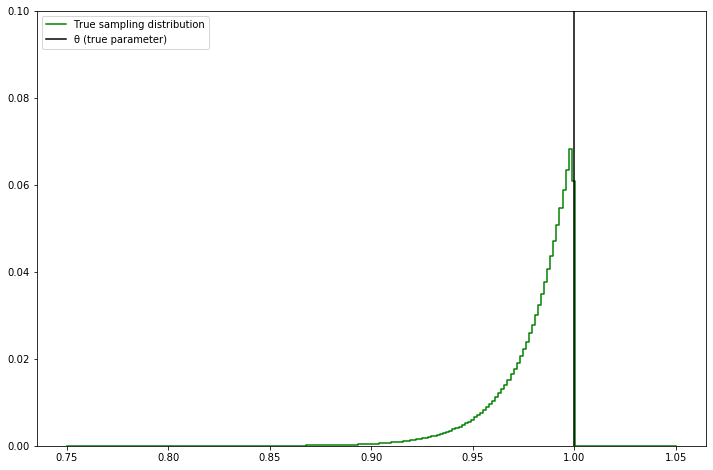

In [31]:
pyplot.figure(figsize=(12, 8))
pyplot.step(bins, theta_cdf_bins_delta, color='green', label='True sampling distribution')
pyplot.axvline(x=1, color='black', label='θ (true parameter)')
pyplot.legend(loc='upper left')
pyplot.ylim(0, 0.1)
pyplot.show()

**(b)**

For the parametric bootstrap process, the estimated parameter $\hat{\theta}^*$ is used on each $k$-th bootstrap sampling $\{ X_{k1}, X_{k2}, \dots, X_{kn} \}$.  But each variable $X_{kj}$ is sampled from  $\text{Uniform}(0, \hat{\theta}^*)$, which is a continuous distribution -- so the probability of obtaining exactly a sample at the boundaries is 0, and $\mathbb{P}(X_{kj} < \hat{\theta}^*) = 1$.  Since the bootstrap functional of each draw, $T(F_n) = \max(F_n)$ is the largest drawn value in each sample, its values will also always be under $\hat{\theta}$, thus the estimated parameter via parametric bootstraping will aywals be under $[\hat{\theta}$, and $\mathbb{P}(\hat{\theta}* = \hat{\theta}) = 0$.

For the nonparametric bootstrap process, the estimated parameter $\hat{\theta}^*$ is the maximum value with a point mass in the empirical distribution function $\hat{F}$.  Each bootstrap resample may or may not include that value when drawing from this sample -- if $\max\{X_1, \dots, X_n\} \in \{X_{k1}, \dots, X_{kn} \}$ then the estimated functional for that bootstrap sample will be the estimated parameter $\hat{\theta}^*$, otherwise it will necessarily be smaller.

Thus, the probability that  $\mathbb{P}(\hat{\theta}* = \hat{\theta})$ is the probability that the largest element on the original data is included in a resampling with replacement.  That turns out to be one minus the probability that it never gets included, so,  $\mathbb{P}(\hat{\theta}* = \hat{\theta}) = 1 - (1 - (1/n))^n$.  But $\lim_{n \rightarrow \infty } (1 + x/n)^n = e^x$, so the given probability goes to $1 - e^{-1} \approx 0.632$. 

**Exercise 9.6.8**.  Let $T_n = \overline{X}_n^2$, $\mu = \mathbb{E}(X_1)$, $\alpha_k = \int |x - \mu|^k dF(x)$ and $\hat{\alpha}_k = n^{-1} \sum_{i=1}^n |X_i - \overline{X}_n|^k$.  Show that

$$v_\text{boot} = \frac{4 \overline{X}_n^2 \hat{\alpha}_2}{n} + \frac{4 \overline{X}_n \hat{\alpha}_3}{n^2} + \frac{\hat{\alpha}_4}{n^3}$$

**Solution**.

First, we rewrite the sample mean in terms of an expression containing the central moments.  Let $S_n = n^{-1} \sum_{i=1}^n (X_i - \overline{X}_n) = 0$.  Then:

$$ \overline{X}_n = S_n + \overline{X}_n = \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X}_n) + \overline{X}_n $$

The bootstrap variance, $\mathbb{V}\left(\overline{X}_n^2\right)$, can be expressed as

$$ \mathbb{V}\left(\overline{X}_n^2\right) = \mathbb{E}\left(\overline{X}_n^4\right) - \mathbb{E}\left(\overline{X}_n^2\right)^2 $$

Note that $\overline{X}_n$ is the mean of the distribution, and can be treated as constant when taking expectations.

We now have:

$$
\begin{align}
\mathbb{E}\left(\overline{X}_n^4\right) &= \mathbb{E}\left( (S_n + \overline{X}_n)^4 \right) \\
&= \mathbb{E}\left( S_n^4 + 4 S_n^3 \overline{X}_n + 6 S_n^2 \overline{X}_n^2 + 4 S_n \overline{X}_n^3 + \overline{X}_n^4 \right) \\
&= \mathbb{E}(S_n^4) + 4 \overline{X}_n \mathbb{E}(S_n^3) + 6 \overline{X}_n^2 \mathbb{E}(S_n^2) + 4 \overline{X}_n^3 \mathbb{E}(S_n) + \overline{X}_n^4
\end{align}
$$

Then, computing the moments of $S_n$,

$$
\begin{align}
\mathbb{E}(S_n) &= 0 \\
\mathbb{E}(S_n^2) &= \mathbb{E}\left( n^{-2} \left( \sum_i X_i - \overline{X}_n \right)^2 \right) = \frac{\hat{\alpha}_2}{n} \\
\mathbb{E}(S_n^3) &= \mathbb{E}\left( n^{-3} \left( \sum_i X_i - \overline{X}_n \right)^3 \right) = \frac{\hat{\alpha}_3}{n^2} \\
\mathbb{E}(S_n^4) &= \mathbb{E}\left( n^{-4} \left( \sum_i X_i - \overline{X}_n \right)^4 + n^{-2}n^{-4} \sum_i \sum_{j \neq i} (X_i - \overline{X}_n)^2 (X_j - \overline{X}_n)^2 \right) = \frac{\hat{\alpha}_4 + \hat{\alpha}_2^2}{n^3}
\end{align}
$$

and finally

$$
\mathbb{E}\left(\overline{X}_n^2\right)^2 = \mathbb{E}\left(\overline{X}_n^2 + S_n\right)^2 = \overline{X}_n^4 + 2 \overline{X}_n^2 \frac{\hat{\alpha}_2}{n} + \frac{\hat{\alpha}_2^2}{n^2}
$$

Putting everything together,

$$
\begin{align}
v_\text{boot} &= \mathbb{E}\left( (S_n + \overline{X}_n)^4 \right) - \mathbb{E}\left(\overline{X}_n^2 + S_n\right)^2 \\
&= \mathbb{E}(S_n^4) + 4 \overline{X}_n \mathbb{E}(S_n^3) + 6 \overline{X}_n^2 \mathbb{E}(S_n^2) + 4 \overline{X}_n^3 \mathbb{E}(S_n) + \overline{X}_n^4 - \left( \overline{X}_n^4 + 2 \overline{X}_n^2 \frac{\hat{\alpha}_2}{n} + \frac{\hat{\alpha}_2^2}{n^2}\right) \\
&= \frac{\hat{\alpha}_4 + \hat{\alpha}_2^2}{n^3} + 4 \overline{X}_n \frac{\hat{\alpha}_3}{n^2} + 6 \overline{X}_n^2 \frac{\hat{\alpha}_2}{n} + 0 + \overline{X}_n^4 - \overline{X}_n^4 - 2 \overline{X}_n^2 \frac{\hat{\alpha}_2}{n} - \frac{\hat{\alpha}_2^2}{n^2} \\
&= \frac{4 \overline{X}_n^2 \hat{\alpha}_2}{n} + \frac{4 \overline{X}_n \hat{\alpha}_3}{n^2} + \frac{\hat{\alpha}_4}{n^3}
\end{align}
$$

*Reference and discussion: https://stats.stackexchange.com/q/26082*